## 1. Import Libraries
Let's import the libraries we'd need for the project

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

## 2. Load Dataset

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv(url, names = names)
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 3. Summarize the Dataset
In this step we're going to look at the dataset in a few different ways:

1. Dimensions of the datset
2. Peek at the dataset itself
3. Statistical summary of all attributes
4. Breakdown of the data by class variable

## 4. Dimensions of the dataset

In [3]:
df.shape

(150, 5)

## 5. Statistical Summary

In [4]:
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df['class'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: class, dtype: int64

## 6. Data Visualisation
We're going to look at two types if plots:
1. Univariate Plot to understand each attribute
2. Multivariate Plot to understand relationship between attributes

### 6.1 Univariate Plot

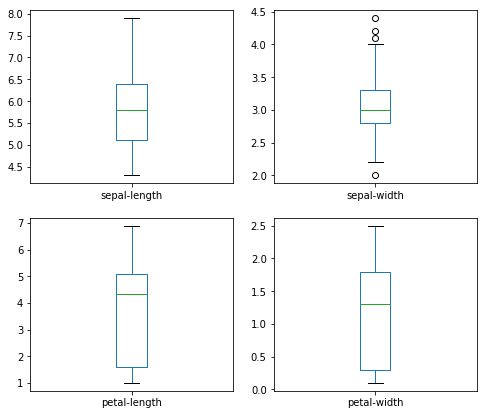

In [6]:
# Box and Whisker Plots
df.plot(kind='box',figsize=(8,7), subplots = True, layout = (2,2), sharex = False, sharey = False)
plt.show()

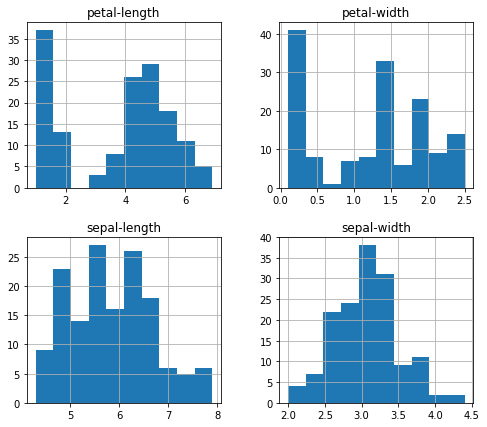

In [7]:
df.hist(figsize=(8,7))
plt.show()

We find that there are two input variables which follow Gaussian Distribution. This is useful for us as we can use algorithms that can exploit this assumption.

### 6.2 Multivariate Plots
Now we can look at the interactions between the variables.
First, lets look at the scatter plot of all pairs of attributes. This can be helpful to spot structured relationship between variables.

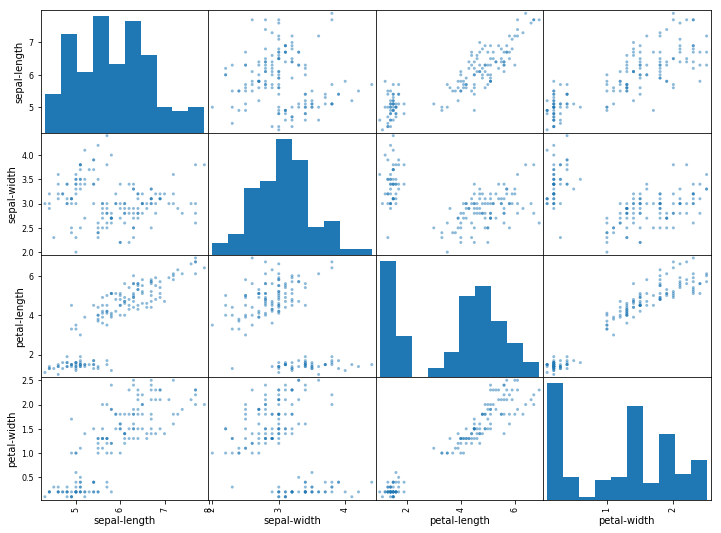

In [8]:
scatter_matrix(df, figsize = (12,9))
plt.show()

Note the diagonal grouping of some pairs of attributes. This suggest a high correlation and a predictable relationship.

## 5. Evaluate some Algorithms
Now it is time to create some models of the data and estimate their accuracy on unseen data.
Here is what we're going to cover in this step:
1. Separate out validation dataset
2. Set-up the test harness to use 10-fold cross validation
3. Build 5 different models from flower measurements
4. Select the Model

### 5.1 Create Validation Dataset
We will split the loaded dataset into two, 80% of which we will use to train our models and 20% that we will hold back as a validation dataset.

In [9]:
array = df.values
x = array[:,0:4]
y = array[:,4]
test = 0.2 #80% of the data will be used for training and 20% for testing
seed = 7
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = test, random_state = seed)

We now have two training sets 'x_train' and 'y_train' along with two validation datasets 'x_test' and 'y_test'.

### 5.2 Test Harness
We will use 10-fold cross validation to estimate accuracy.
This will split up the dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train test splits.

In [10]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

We are using the metric of ‘accuracy‘ to evaluate models. This is a ratio of the number of correctly predicted instances in divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). We will be using the scoring variable when we run build and evaluate each model next.

## 6. Building Models
We don't know which algorithms would be good on this problem or what configurations to use. We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.<br><br> We'll be evaluating 6 different algorithms:
1. Logistic Regression (LR)
2. Linear Discriminant Analysis (LDA)
3. K-Nearest Neighbours (KNN)
4. Classification and Regression Trees (CART)
5. Gaussian Naive Bayes (GNB)
6. Support Vector Machines (SVM)

<br>
This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms. We reset the random number seed before each run to ensure that the evaluation of each algorithm is performed using exactly the same data splits. It ensures the results are directly comparable.

In [11]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# Evaluating each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


## 7. Select Best Models

We find that according to the results obtained in the previous line SVM has the most accuracy.<br><br>We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (10 fold cross validation).

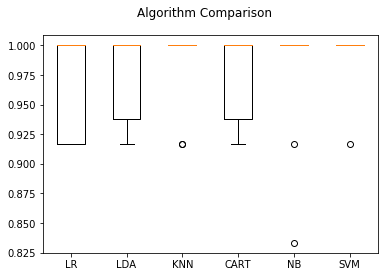

In [12]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## 8. Make Predictions
The SVM algorithm was the most accurate model that we tested. Now we want to get an idea of the accuracy of the model on our validation set.

This will give us an independent final check on the accuracy of the best model. It is valuable to keep a validation set just in case you made a slip during training, such as overfitting to the training set or a data leak. Both will result in an overly optimistic result.

We can run the SVM model directly on the validation set and summarize the results as a final accuracy score, a confusion matrix and a classification report.

In [13]:
svm = SVC()
svm.fit(x_train,y_train)
predictions = svm.predict(x_test)
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

      micro avg       0.93      0.93      0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30

